## Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
!pip install geoplot
!pip install pyshp

import os 
import pickle
import zipfile
import pyproj

import re
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
import geoplot
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point, Polygon, LineString

import shapefile
from pyproj import CRS, Transformer

import pathlib
from glob import glob
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 12.9 MB/s 
     |████████████████████████████████| 6.3 MB 60.0 MB/s 
     |████████████████████████████████| 16.7 MB 47.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 32.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 44.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 31.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 22.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |█████████████████████████████

## Unzip

In [ ]:
# path  = Path('/content/drive/MyDrive/Colab Notebooks/PineTree/')

# zip_list = glob('**/**.zip')

# for z in zip_list:
#   t = z.split('/')
#   new_path = path / t[0] / Path(str(t[1][:-4]))
#   os.mkdir(new_path)
#   zipfile.ZipFile(path+z).extractall(new_path)

In [ ]:
# path  = Path('/content/drive/MyDrive/Colab Notebooks/PineTree/LocalWeather/Kangwon')

# os.chdir(str(path))

# zip_list = glob('**/**.zip')

# for z in zip_list:
#   t = z.split('_')
#   new_path = path / Path(t[2] + "_" + t[-2])
#   os.mkdir(str(new_path))
#   zipfile.ZipFile(str(path / z)).extractall(str(new_path))

## DataLoad

In [ ]:
path  = Path('/content/drive/MyDrive/Colab Notebooks/PineTree')
os.chdir(str(path))

with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_bug.pickle'), 'rb') as f:
  df_bug = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_floor.pickle'), 'rb') as f:
#   df_floor = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kaddr.pickle'), 'rb') as f:
#   df_kaddr = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_fcd.pickle'), 'rb') as f:
#   df_fcd = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kasos.pickle'), 'rb') as f:
#   df_kasos = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kaws.pickle'), 'rb') as f:
#   df_kaws = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kws.pickle'), 'rb') as f:
#   df_kws = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'df_station.pickle'), 'rb') as f:
#   df_station = pickle.load(f)


## EDA

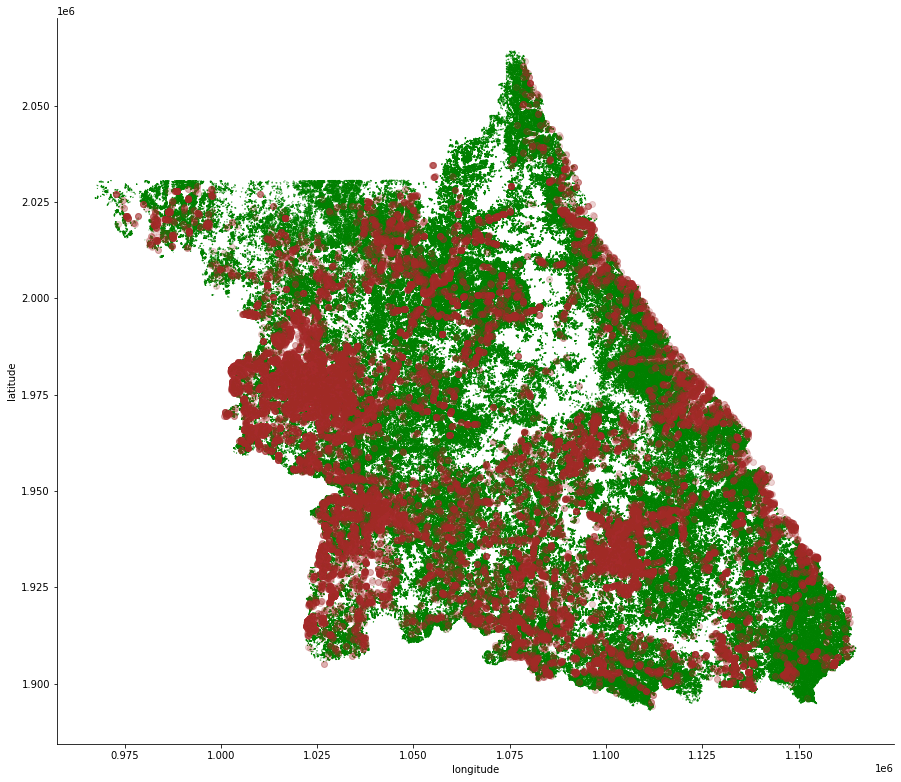

In [ ]:
# pine = gpd.GeoDataFrame.from_file(str(path / 'PineTrees' / 'pineTrees.gpkg'), encoding='cp949')
# pine_occ = pd.read_csv(str(path / 'BugOccur' / 'Kangwon' / 'KangwonBugOccur.csv'))

# pine_occ['WKT'] = pine_occ['WKT'].apply(wkt.loads).apply(Point)
# pine_occ_gdf = gpd.GeoDataFrame(pine_occ, geometry='WKT', crs='EPSG:5179')

# fig, gax = plt.subplots(figsize=(15,15))

# pine.plot(ax=gax, edgecolor='green',color='white')

# gax.set_xlabel('longitude')
# gax.set_ylabel('latitude')

# pine_occ_gdf.plot(ax=gax, color='brown', alpha = 0.2)

# gax.spines['top'].set_visible(False)
# gax.spines['right'].set_visible(False)

# plt.show()

## Data Processing

### Mapping

#### LocalCode

##### 쿼리를 연결해주는 지역 코드 생성 (임상도, 날씨)

In [ ]:
df_fcd = pd.read_csv(str(path / 'LocalCode' / 'Kangwon' / 'FloorPlan.csv'), encoding='cp949')

display(df_fcd.head(5))

,시도명,시군명,코드
0,강원도,춘천시,42110
1,강원도,원주시,42130
2,강원도,강릉시,42150
3,강원도,동해시,42170
4,강원도,태백시,42190


### Path Upload

#### BugOccur

##### 강원도 지방의 소나무재선충 발생 지역

In [ ]:
bug_path_list = []

bug_path = path / 'BugOccur' / 'Kangwon'

for p in bug_path.iterdir():
  if str(p).split('/')[-1].split('.')[0].isdigit() and str(p).split('/')[-1].split('.')[1] == 'csv':
    bug_path_list.append(p)

bug_path_list[0]

PosixPath('/content/drive/MyDrive/Colab Notebooks/PineTree/BugOccur/Kangwon/42110.csv')

#### FloorPlan

##### 임상도

In [ ]:
floor_path_list = []

floor_path = path / 'FloorPlan' / 'LocalFloorPlan' / 'Kangwon'

for p in floor_path.iterdir():
  if p.is_dir() and str(p).split('/')[-1] != '.ipynb_checkpoints':
    floor_path_list.append(glob(str(p) + '/**.shp')[0])
    print(p)

floor_path_list[0]

/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42170
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42820
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42830
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42190
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42130
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42730
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42210
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42790
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42780
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42760
/content/drive/MyDrive/Colab N

'/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42170/TB_FGDI_FS_IM5000_42170.shp'

### DataFrame

#### Pine Bug Occur

##### 시군구 소나무 재선충 발생

In [ ]:
df_bug = pd.DataFrame()

for p in bug_path_list:
  tmp = pd.read_csv(p, encoding='cp949')
  tmp['LOCAL_CODE'] = int(str(p).split('/')[-1][:-4])
  df_bug = pd.concat([df_bug, tmp])

df_bug = df_bug.reset_index(drop=True)
df_bug = gpd.GeoDataFrame(df_bug)

df_bug.tail(2)

,WKT,OCCRR_NO,DBHIS_CD,MNAGN_CD,ARA_XCRD,ARA_YCRD,NTN_SPOT,LGDNG_CD,IFTTR_TPCD,EXMNN_OTST,...,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,LOCAL_CODE,WKT.1
104610,MULTIPOINT ((1106172.6568 2004015.1488)),17653449.0,1001.0,4350000,350117.0,604706.0,占쏙옙占쏙옙06170401,4283033029,1.0,20210412,...,49,1.0,3.0,C,10.0,J11249,ARP-13C,NaN,42830,NaN
104611,MULTIPOINT ((1106173.6724 2004018.1417)),17653450.0,1001.0,4350000,350118.0,604709.0,占쏙옙占쏙옙06170401,4283033029,1.0,20210412,...,49,1.0,3.0,C,10.0,J11249,ARP-13C,NaN,42830,NaN


#### Bug Not Occur

##### 소나무재선충에 감염되지 않은 소나무

In [ ]:
# QGIS로 Data 수집 중

#### FloorPlan

##### 지역코드를 삽입한 시군구 등고선

In [ ]:
df_floor = gpd.GeoDataFrame()

for p in floor_path_list:
  tmp = gpd.GeoDataFrame.from_file(str(p), encoding='cp949')
  tmp['LOCAL_CODE'] = int(str(p).split('/')[-1][:-4].split('_')[-1])
  print(p)

  df_floor = gpd.GeoDataFrame( pd.concat([df_floor, tmp], ignore_index=True))

df_floor.head(3)

/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42170/TB_FGDI_FS_IM5000_42170.shp
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42820/TB_FGDI_FS_IM5000_42820.shp
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42830/TB_FGDI_FS_IM5000_42830.shp
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42190/TB_FGDI_FS_IM5000_42190.shp
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42130/TB_FGDI_FS_IM5000_42130.shp
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42730/TB_FGDI_FS_IM5000_42730.shp
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42210/TB_FGDI_FS_IM5000_42210.shp
/content/drive/MyDrive/Colab Notebooks/PineTree/FloorPlan/LocalFloorPlan/Kangwon/FRT001003_42790/TB_FGDI_FS_IM5000_42790.shp


,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,ETC_PCMTT,geometry,LOCAL_CODE
0,0,0,0,91,None,None,None,None,J00091,S,None,"POLYGON ((1132845.902 1941229.074, 1132842.735...",42170
1,0,0,0,93,None,None,None,None,J00093,C,None,"POLYGON ((1134245.652 1941613.775, 1134245.287...",42170
2,1,1,1,13,0,1,A,00,J11113,ALL-01A,None,"MULTIPOLYGON (((1131505.074 1942890.864, 11315...",42170


#### LocalWeather

##### 종관기상관측정보 및 방재기상관측정보

In [ ]:
asos = pd.read_csv(str(path / 'LocalWeather' / 'Kangwon' / 'OBS_ASOS_MNH.csv'), encoding='cp949')
aws = pd.read_csv(str(path / 'LocalWeather' / 'Kangwon' / 'OBS_AWS_MNH.csv'), encoding='cp949')

display(asos)
display(aws)

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),...,평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C)
0,90,속초,2019-01,1.7,6.3,-3.0,12.8,-9.0,20190130,20190116,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90,속초,2019-02,2.5,6.5,-1.7,15.7,-7.3,20190224,20190208,...,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,속초,2019-03,8.2,13.1,3.1,21.6,-1.4,20190319,20190314,...,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,속초,2019-04,11.9,16.6,6.9,25.9,1.3,20190417,20190411,...,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,속초,2019-05,19.8,25.0,14.7,34.2,6.5,20190525,20190506,...,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,217,정선군,2022-01,-4.0,2.7,-10.1,10.0,-15.2,20220123,20220101,...,-1.8,-2.0,-1.9,-1.3,-0.5,NaN,NaN,NaN,NaN,NaN
570,217,정선군,2022-02,-2.8,3.8,-8.7,11.4,-14.3,20220212,20220224,...,0.7,-1.4,-2.0,-1.3,-0.9,NaN,NaN,NaN,NaN,NaN
571,217,정선군,2022-03,5.6,12.5,-0.6,19.4,-7.8,20220316,20220307,...,5.8,4.4,3.5,3.3,2.7,NaN,NaN,NaN,NaN,NaN
572,217,정선군,2022-04,12.5,20.4,5.0,28.6,-2.1,20220412,20220403,...,15.7,13.2,12.3,12.4,11.7,NaN,NaN,NaN,NaN,NaN


,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
0,310,궁촌,2019-01,3.1,8.3,-2.0,12.2,-5.6,20190130,20190126,2.2,16.8,345.9,20190105,15.0
1,310,궁촌,2019-02,3.9,8.7,-1.3,13.4,-5.1,20190228,20190210,2.0,12.0,0.0,20190209,13.5
2,310,궁촌,2019-03,8.7,14.6,3.0,23.6,-0.4,20190327,20190318,2.2,21.4,300.9,20190327,52.0
3,310,궁촌,2019-04,12.0,17.7,6.5,24.3,1.3,20190423,20190401,2.1,15.8,16.9,20190408,72.0
4,310,궁촌,2019-05,18.9,25.0,12.7,34.7,3.5,20190526,20190507,1.9,13.4,14.1,20190529,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,978,춘천신북,2022-01,-4.0,2.7,-10.4,9.0,-15.7,20220123,20220114,1.1,9.8,25.3,20220123,2.2
3122,978,춘천신북,2022-02,-2.7,4.7,-9.3,11.8,-14.5,20220228,20220217,1.5,12.7,320.6,20220226,6.9
3123,978,춘천신북,2022-03,6.2,13.1,-0.3,19.3,-7.2,20220312,20220307,1.6,12.2,45.0,20220317,89.1
3124,978,춘천신북,2022-04,13.4,21.7,5.6,30.4,-1.6,20220426,20220403,1.9,13.1,33.8,20220428,26.5


In [ ]:
aws.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)',
       '최저기온(°C)', '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균풍속(m/s)',
       '최대순간풍속(m/s)', '최대순간풍속풍향(deg)', '최대순간풍속 나타난날(yyyymmdd)', '월강수량합(mm)'],
      dtype='object')

#### LegalAddress

In [ ]:
df_addr = pd.read_csv(str(path / 'LegalAddress' / 'LegalAddress.csv'), encoding='cp949')
display(df_addr.head(2))

df_addr = df_addr.drop(['순위', '생성일자', '삭제일자', '과거법정동코드'], axis=1)
print()
df_addr.head(2)

,법정동코드,시도명,시군구명,읍면동명,리명,순위,생성일자,삭제일자,과거법정동코드
0,4223033031,강원도,삼척시,노곡면,상군천리,11.0,1995-01-01,NaN,NaN
1,4223033032,강원도,삼척시,노곡면,둔달리,12.0,1995-01-01,NaN,NaN


,법정동코드,시도명,시군구명,읍면동명,리명
0,4223033031,강원도,삼척시,노곡면,상군천리
1,4223033032,강원도,삼척시,노곡면,둔달리


In [ ]:
a = 'sdfweQfafrgA'.capitalize()
a

'Sdfweqfafrga'

In [ ]:
# display(weather_kangwon_code.head(3))
display(df_fcd.head(3))

df_kaddr = df_addr[df_addr['시도명'] == '강원도']

df_kaddr['코드'] = df_kaddr['시군구명'].apply(lambda x: 42110 if x in ['춘천시', '춘천군', '춘성군'] \
                                  else 42130 if x in ['원주시', '원주군', '원성군'] else 42150 if x in ['강릉시', '강릉군', '명주군'] else 42170 if x in ['동해시', '동해군']else 42190 if x in ['태백시', '태백군'] \
                                  else 42210 if x in ['속초시', '속초군'] else 42230 if x in ['삼척시', '삼척군'] else 42720 if x == '홍천군' else 42730 if x == '횡성군' \
                                  else 42750 if x == '영월군' else 42760 if x == '평창군' else 42770 if x == '정선군' else 42780 if x == '철원군' \
                                  else 42790 if x == '화천군' else 42800 if x == '양구군' else 42810 if x == '인제군' else 42820 if x == '고성군' \
                                  else 42830 if x == '양양군' else 0)

df_kaddr = df_kaddr.drop(df_kaddr[df_kaddr['코드'] == 0].index) # 울진군은 경상도로 이전

df_kaddr.head(3)

,시도명,시군명,코드
0,강원도,춘천시,42110
1,강원도,원주시,42130
2,강원도,강릉시,42150


,법정동코드,시도명,시군구명,읍면동명,리명,코드
0,4223033031,강원도,삼척시,노곡면,상군천리,42230
1,4223033032,강원도,삼척시,노곡면,둔달리,42230
2,4223033033,강원도,삼척시,노곡면,주지리,42230


### Preprocessiong Missing Value

##### asos는 컬럼당 결측값이 200개가 넘고, 중요 변수가 아닌 컬럼은 삭제 <br/> aws는 결측값이 20개 미만이고 중요 변수이므로 기상청 일별 데이터를 추가 수집하여 평균 적용

In [ ]:
asos = asos.dropna(axis=1)
asos.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)',
       '최저기온(°C)', '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '평균현지기압(hPa)',
       '평균해면기압(hPa)', '최고해면기압(hPa)', '최저해면기압(hPa)', '최고해면기압 나타난날(yyyymmdd)',
       '최저해면기압 나타난날(yyyymmdd)', '평균수증기압(hPa)', '최고수증기압(hPa)', '최저수증기압(hPa)',
       '최고수증기압 나타난날(yyyymmdd)', '최저수증기압 나타난날(yyyymmdd)', '평균이슬점온도(°C)',
       '평균상대습도(%)', '최소상대습도(%)', '최소상대습도 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)',
       '일최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)', '평균풍속(m/s)', '최대풍속(m/s)',
       '최대순간풍속(m/s)', '최대풍속 풍향(16방위)', '최대순간풍속 풍향(16방위)',
       '최대풍속 나타난날(yyyymmdd)', '최대순간풍속 나타난날(yyyymmdd)', '최다풍향(16방위)',
       '합계 일조시간(hr)', '일조율(%)', '평균 최저초상온도(°C)', '최저초상온도(°C)',
       '최저초상온도 나타난날(yyyymmdd)', '평균지면온도(°C)'],
      dtype='object')

In [ ]:
aws

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
0,310,궁촌,2019-01,3.1,8.3,-2.0,12.2,-5.6,20190130,20190126,2.2,16.8,345.9,20190105,15.0
1,310,궁촌,2019-02,3.9,8.7,-1.3,13.4,-5.1,20190228,20190210,2.0,12.0,0.0,20190209,13.5
2,310,궁촌,2019-03,8.7,14.6,3.0,23.6,-0.4,20190327,20190318,2.2,21.4,300.9,20190327,52.0
3,310,궁촌,2019-04,12.0,17.7,6.5,24.3,1.3,20190423,20190401,2.1,15.8,16.9,20190408,72.0
4,310,궁촌,2019-05,18.9,25.0,12.7,34.7,3.5,20190526,20190507,1.9,13.4,14.1,20190529,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,978,춘천신북,2022-01,-4.0,2.7,-10.4,9.0,-15.7,20220123,20220114,1.1,9.8,25.3,20220123,2.2
3122,978,춘천신북,2022-02,-2.7,4.7,-9.3,11.8,-14.5,20220228,20220217,1.5,12.7,320.6,20220226,6.9
3123,978,춘천신북,2022-03,6.2,13.1,-0.3,19.3,-7.2,20220312,20220307,1.6,12.2,45.0,20220317,89.1
3124,978,춘천신북,2022-04,13.4,21.7,5.6,30.4,-1.6,20220426,20220403,1.9,13.1,33.8,20220428,26.5


In [ ]:
aws.isnull().sum()

temp_aws = aws.copy()
temp_asos = asos.copy()

In [ ]:
aws_supple_list = glob(str(path / 'LocalWeather' / 'Kangwon' / 'SupplementalDate' / '**.csv'))
aws_supple_list.sort()

for idx in range(len(aws_supple_list)):
  n = aws_supple_list[idx].split('/')[-1].split('_')
  m = n[-1].split('.')

  exec(f'{n[1].lower()}_{n[2]}_{m[0]} = pd.read_csv(aws_supple_list[{idx}], encoding="cp949")')

table_define = {'4': ['평균기온(°C)', 1], 
                '5': ['평균최고기온(°C)', 4], '6': ['평균최저기온(°C)', 2], '11': ['평균풍속(m/s)', 9]}

for i in aws[aws['평균풍속(m/s)'].isnull()].sort_values(by=['일시'], axis=0, ascending=True, inplace=False).itertuples():
  table = i.지점명
  time = i.일시
  index = i.Index
  print(index)

  table_ = []
  for idx in range(16):
    if pd.isna(i[idx]):
      table_.append(idx)

  k = time.split('-')
  exec(f't = aws_{k[0]}_{k[1]}[aws_{k[0]}_{k[1]}.지점명 == "{table}"].describe().mean()')

  for z in table_:
    if str(z) in table_define.keys():
      exec(f'aws.loc[{index},"{table_define[str(z)][0]}"] = t[{table_define[str(z)][1]}]')

82
2857
2858
1937
715
1992
1098
1180
1181
2447
2469
3043
2883
246
1069
1402
1239


In [ ]:
t

지점                   445.375000
평균기온(°C)              35.744049
최저기온(°C)              31.874889
최저기온 시각(hhmi)        937.201574
최고기온(°C)              41.343450
최고기온 시각(hhmi)       1007.191661
일강수량(mm)              36.814825
최대 순간 풍속(m/s)         32.122871
최대 순간풍속 시각(hhmi)    1056.728714
평균 풍속(m/s)            26.274020
최대 순간 풍속 풍향(deg)     182.385030
dtype: float64

In [ ]:
aws

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
0,310,궁촌,2019-01,3.1,8.3,-2.0,12.2,-5.6,20190130,20190126,2.2,16.8,345.9,20190105,15.0
1,310,궁촌,2019-02,3.9,8.7,-1.3,13.4,-5.1,20190228,20190210,2.0,12.0,0.0,20190209,13.5
2,310,궁촌,2019-03,8.7,14.6,3.0,23.6,-0.4,20190327,20190318,2.2,21.4,300.9,20190327,52.0
3,310,궁촌,2019-04,12.0,17.7,6.5,24.3,1.3,20190423,20190401,2.1,15.8,16.9,20190408,72.0
4,310,궁촌,2019-05,18.9,25.0,12.7,34.7,3.5,20190526,20190507,1.9,13.4,14.1,20190529,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,978,춘천신북,2022-01,-4.0,2.7,-10.4,9.0,-15.7,20220123,20220114,1.1,9.8,25.3,20220123,2.2
3122,978,춘천신북,2022-02,-2.7,4.7,-9.3,11.8,-14.5,20220228,20220217,1.5,12.7,320.6,20220226,6.9
3123,978,춘천신북,2022-03,6.2,13.1,-0.3,19.3,-7.2,20220312,20220307,1.6,12.2,45.0,20220317,89.1
3124,978,춘천신북,2022-04,13.4,21.7,5.6,30.4,-1.6,20220426,20220403,1.9,13.1,33.8,20220428,26.5


In [ ]:
temp_aws = temp_aws.drop(['최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '최대순간풍속 나타난날(yyyymmdd)'], axis=1)


temp_asos = temp_asos[['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)', '평균풍속(m/s)', '최대순간풍속(m/s)', '최대순간풍속 풍향(16방위)', '월합강수량(00~24h만)(mm)']]

weather_columns = ['STATION_ID', 'STATION_NAME', 'DATE', 'CELSIUS_AVG', 'MAX_CELSIUS_AVG', 'MIN_CELSIUS_AVG', 'MAX_CELSIUS', 'MIN_CELSIUS', 'WS_AVG_MS', 'MAX_WS_MS', 'MAX_IWS_DEG', 'MRF_SUM_MM']

temp_aws.columns = weather_columns
temp_asos.columns = weather_columns

In [ ]:
temp_aws.isnull().sum()

STATION_ID         0
STATION_NAME       0
DATE               0
CELSIUS_AVG        0
MAX_CELSIUS_AVG    0
MIN_CELSIUS_AVG    0
MAX_CELSIUS        0
MIN_CELSIUS        0
WS_AVG_MS          0
MAX_WS_MS          0
MAX_IWS_DEG        0
MRF_SUM_MM         0
dtype: int64

In [ ]:
temp_asos.isnull().sum()

STATION_ID         0
STATION_NAME       0
DATE               0
CELSIUS_AVG        0
MAX_CELSIUS_AVG    0
MIN_CELSIUS_AVG    0
MAX_CELSIUS        0
MIN_CELSIUS        0
WS_AVG_MS          0
MAX_WS_MS          0
MAX_IWS_DEG        0
MRF_SUM_MM         0
dtype: int64

In [ ]:
aws

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),최대순간풍속 나타난날(yyyymmdd),월강수량합(mm)
0,310,궁촌,2019-01,3.1,8.3,-2.0,12.2,-5.6,20190130,20190126,2.2,16.8,345.9,20190105,15.0
1,310,궁촌,2019-02,3.9,8.7,-1.3,13.4,-5.1,20190228,20190210,2.0,12.0,0.0,20190209,13.5
2,310,궁촌,2019-03,8.7,14.6,3.0,23.6,-0.4,20190327,20190318,2.2,21.4,300.9,20190327,52.0
3,310,궁촌,2019-04,12.0,17.7,6.5,24.3,1.3,20190423,20190401,2.1,15.8,16.9,20190408,72.0
4,310,궁촌,2019-05,18.9,25.0,12.7,34.7,3.5,20190526,20190507,1.9,13.4,14.1,20190529,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,978,춘천신북,2022-01,-4.0,2.7,-10.4,9.0,-15.7,20220123,20220114,1.1,9.8,25.3,20220123,2.2
3122,978,춘천신북,2022-02,-2.7,4.7,-9.3,11.8,-14.5,20220228,20220217,1.5,12.7,320.6,20220226,6.9
3123,978,춘천신북,2022-03,6.2,13.1,-0.3,19.3,-7.2,20220312,20220307,1.6,12.2,45.0,20220317,89.1
3124,978,춘천신북,2022-04,13.4,21.7,5.6,30.4,-1.6,20220426,20220403,1.9,13.1,33.8,20220428,26.5


In [ ]:
df_bug = df_bug.drop(['OCCRR_NO', 'NTN_SPOT', 'LGDNG_CD', 'IFTTR_TPCD', 'FRST_RGTER', 'FRST_RGSTN', 'LAST_UPUSR', 'LAST_UPDT', 'HEIGHT', 'ETC_PCMTT', 'WKT.1'], axis=1)

### Weather Station

In [ ]:
# df_ws = pd.DataFrame()

# pattern_punctuation = re.compile(r'[^\w\s]')

# for idx in range(1, 6):
#   url = 'https://www.weather.go.kr/w/wnuri-fct/weather/sfc-aws-weather.do?sido=' + str(idx) + '&city=&unit=km%2Fh'
#   uop = urlopen(url)
  
#   soup = BeautifulSoup(uop.read(), 'html.parser')
#   test = soup.find_all('td')

#   pattern_1 = re.compile('<.*?>')
#   cleantext = re.sub('&nbsp;| |\t|\r|\n', '', re.sub(pattern_1, '', str(test))).split(',')
#   cleantext = re.sub(pattern_1, '', str(test)).split(',')

#   for i, j in enumerate(cleantext):
#     if not(i % 7):

#       string = pattern_punctuation.sub('', j)
#       station_id = int(re.sub(r'[^0-9]', '', string))
#       station_name = re.sub(r'[^가-힣]', '', string)
  
#     if i != 1 and not((i+1) % 7):
#       j = j.lstrip().rstrip(']').rstrip().split(' ')
      
#       station_do = station_si = station_gungu = station_dong = station_eup = station_myeon = station_ri = ''

#       for adr in j:
#         adr = adr.strip()
#         if adr[-1] in ['도']:
#           station_do = adr
#         elif adr[-1] in ['시']:
#           station_si = adr
#         elif adr[-1] in ['군', '구']:
#           station_gungu = adr
#         elif adr[-1] in ['동']:
#           station_dong = adr
#         elif adr[-1] in ['읍']:
#           station_eup = adr
#         elif adr[-1] in ['면']:
#           station_myeon = adr
#         elif adr[-1] in ['리']:
#           station_ri = adr
    
#       tmp = pd.DataFrame({'station_id': [station_id], 'station_name': [station_name], 'station_do': [station_do],
#                         'station_si': [station_si], 'station_gungu': [station_gungu], 'station_dong': [station_dong],
#                         'station_eup': [station_eup], 'station_myeon': [station_myeon], 'station_ri': [station_ri]})

#       df_ws = pd.concat([df_ws, tmp], axis=0)

# df_ws = df_ws.reset_index(drop=True)
# df_ws

,station_id,station_name,station_do,station_si,station_gungu,station_dong,station_eup,station_myeon,station_ri
0,400,강남,,서울특별시,강남구,삼성동,,,
1,402,강동,,서울특별시,강동구,고덕동,,,
2,424,강북,,서울특별시,강북구,수유동,,,
3,404,강서,,서울특별시,강서구,화곡동,,,
4,425,남현,,서울특별시,관악구,남현동,,,
...,...,...,...,...,...,...,...,...,...
669,890,신례,제주특별자치도,서귀포시,,,남원읍,,신례리
670,793,대정,제주특별자치도,서귀포시,,,대정읍,,일과리
671,862,김녕,제주특별자치도,제주시,,,구좌읍,,김녕리
672,861,월정,제주특별자치도,제주시,,,구좌읍,,월정리


In [ ]:
df_ws.isnull().sum()

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kws.pickle'), 'rb') as f:
#   df_kws = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kaddr.pickle'), 'rb') as f:
#   df_kaddr = pickle.load(f)


# display(df_ws.isnull().sum())

# idx_ = []
# for idx, row in enumerate(df_ws.itertuples()):
#   if (row.station_do == '강원도') or (row.station_do == '(산간)강원도'):
#     idx_.append(idx)

# df_kws = df_ws.loc[idx_]
# df_kws = df_kws.reset_index()
# df_kws = df_kws.drop(['index'], axis=1)

# df_kws['station_do'] = df_kws['station_do'].apply(lambda x: '강원도'  if x == '(산간)강원도' else '강원도')

# df_kws.head()

# df_kws = df_kws.drop(['station_do', 'station_si', 'station_gungu', 'station_dong', 'station_eup', 'station_myeon', 'station_ri'], axis=1)

# df_kws['latitude'] = -1
# df_kws['longitude'] = -1



In [ ]:
a = [1, 2, 3]

type(a) == list

True

### Mapping Working

In [ ]:
# # with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kws.pickle'), 'rb') as f:
# #   df_kws = pickle.load(f)

# # with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kaddr.pickle'), 'rb') as f:
# #   df_kaddr = pickle.load(f)

# df_station = pd.read_csv(str(path / 'LocalCode' / 'station.csv'))

# df_station = df_station.sort_values('시작일')
# df_station = df_station.drop_duplicates(subset=['지점', '지점명'], keep='last')

# no_lat_mapping = []
# no_long_mapping = []


# for row in df_kws.itertuples(): 

#   condition = (df_station.지점 == row[1]) & (df_station.지점명 == row[2])

#   lat = list(df_station[condition]['위도'])
#   log = list(df_station[condition]['경도'])

#   df_kws.loc[row[0], 'latitude'] =  lat[0] if len(lat) != 0 else no_lat_mapping.append(row)
#   df_kws.loc[row[0], 'longitude'] = log[0] if len(log) != 0 else no_long_mapping.append(row)

# null_lat_mapping = []
# null_long_mapping = []

# for row in no_lat_mapping:
#   condition = (df_station.지점 == row[1])

#   lat = list(df_station[condition]['위도'])
#   log = list(df_station[condition]['경도'])

#   df_kws.loc[row[0], 'latitude'] =  lat[0] if len(lat) != 0 else null_lat_mapping.append(row)
#   df_kws.loc[row[0], 'longitude'] = log[0] if len(log) != 0 else null_long_mapping.append(row)

# df_kws.columns = ['STATION_ID', 'STATION_NAME', 'STATION_LATITUDE', 'STATION_LONGITUDE']
# df_station.columns = ['STATION_ID', 'STATION_DATE', 'STATION_NAME', 'STATION_LATITUDE', 'STATION_LONGITUDE']
# df_kws.STATION_LATITUDE = df_kws.STATION_LATITUDE.astype('float')
# df_kws.STATION_LONGITUDE = df_kws.STATION_LONGITUDE.astype('float')


In [ ]:
# def project_array(coord, p1_type, p2_type):
#     """
#     좌표계 변환 함수
#     - coord: x, y 좌표 정보가 담긴 NumPy Array
#     - p1_type: 입력 좌표계 정보 ex) epsg:5179
#     - p2_type: 출력 좌표계 정보 ex) epsg:4326
#     """
#     p1 = pyproj.Proj(init=p1_type)
#     p2 = pyproj.Proj(init=p2_type)
#     fx, fy = pyproj.transform(p1, p2, coord[:, 4], coord[:, 3])
#     return np.dstack([fx, fy])[0]

# df_station = df_station.dropna()
# df_station_test = df_station.copy()
# coord = np.array(df_station_test)
# #coord


# # 좌표계 정보 설정
# p1_type = "epsg:4326"
# p2_type = "epsg:5179"

# # project_array() 함수 실행
# df_station_test = project_array(coord, p1_type, p2_type)

# df_station['STATION_LONGITUDE'] = df_station_test[:, 1]
# df_station['STATION_LATITUDE'] = df_station_test[:, 0]

# df_station

,STATION_ID,STATION_DATE,STATION_NAME,STATION_LATITUDE,STATION_LONGITUDE
1,65,1900-01-01,사리원,848889.602811,2.058755e+06
2,67,1900-01-01,신계,915704.906464,2.055921e+06
3,68,1900-01-01,용연,770867.154769,2.025428e+06
4,69,1900-01-01,해주,842029.976330,2.005224e+06
5,70,1900-01-01,개성,918020.824421,1.996716e+06
...,...,...,...,...,...
5775,47884,2022-04-01,서귀포,908495.867257,1.474649e+06
504,493,2022-05-13,송악,956081.782757,1.859907e+06
1099,642,2022-05-23,오월드,990652.338907,1.810449e+06
579,511,2022-05-27,경서동,923619.542930,1.952366e+06


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/PineTree/bug_re'

dl = os.listdir(path)
dl.sort()

print(dl)

for d in dl:
  data = pd.read_csv(path + '/' + d)
  data = data[['OCCRR_NO', 'DBHIS_CD', 'MNAGN_CD', 'ARA_XCRD', 'ARA_YCRD', 'EXMNN_OTST', 'LOCAL_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', \
               'DMCLS_CD', 'AGCLS_CD', 'DNST_CD', 'HEIGHT', 'LDMARK_STN', 'MAP_LABEL', 'LATITUDE', 'LONGITUDE', 'STATION_ID']]
  
  data = data.fillna(-1)
  
  for c in ['OCCRR_NO', 'DBHIS_CD', 'EXMNN_OTST', 'LOCAL_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'HEIGHT', 'STATION_ID']:
    data[c] = data[c].astype(int)
  
  data = data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
  data = data.reset_index(drop=True)
  data = data.reset_index()
  data.columns = col_list

  with open('/content/drive/MyDrive/Colab Notebooks/PineTree/bug_re/' + d.split('.')[0], 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

['busan_bug.csv', 'chungbuk_bug.csv', 'chungnam_bug.csv', 'daegu_bug.csv', 'daejeon_bug.csv', 'gwangju_bug.csv', 'gyeongbuk_bug.csv', 'gyeonggi_bug.csv', 'jeju_bug.csv', 'jeonbuk_bug.csv', 'jeonnam_bug.csv', 'seoul_bug.csv', 'ulsan_bug.csv']


In [ ]:
data.columns

Index(['index', 'OCCRR_NO', 'DBHIS_CD', 'MNAGN_CD', 'ARA_XCRD', 'ARA_YCRD',
       'EXMNN_OTST', 'LOCAL_CD', 'SIDO', 'SGG', 'STORUNST', 'FROR_CD',
       'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'DNST_CD', 'HEIGHT',
       'LDMARK_STN', 'MAP_LABEL', 'LATITUDE', 'LONGITUDE', 'STATION_ID'],
      dtype='object')

In [ ]:
col_list

['SEED',
 'OCCRR_NO',
 'DBHIS_CD',
 'MNAGN_CD',
 'ARA_XCRD',
 'ARA_YCRD',
 'EXMNN_OTST',
 'LOCAL_CD',
 'STORUNST',
 'FROR_CD',
 'FRTP_CD',
 'KOFTR_GROU',
 'DMCLS_CD',
 'AGCLS_CD',
 'DNST_CD',
 'HEIGHT',
 'LDMARK_STN',
 'MAP_LABEL',
 'LATITUDE',
 'LONGITUDE',
 'STATION_ID']

In [ ]:
#data = data.drop(['WKT'], axis=1)
#data['OCCRR_NO'] =  data['OCCRR_NO'].astype(int)
data = data.fillna(-1)
for c in ['OCCRR_NO', 'DBHIS_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'HEIGHT']:
  data[c] = data[c].astype(int)


In [ ]:
data['EXMNN_OTST'] = pd.to_datetime(data['EXMNN_OTST'])

In [ ]:
data = pd.read_csv(path + '/' + 'busan_bug.csv')

print(len(data))

data = data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

print(len(data))

131681
131459


In [ ]:
len(col_list)

20

In [ ]:
col_list

['SEED',
 'OCCRR_NO',
 'DBHIS_CD',
 'MNAGN_CD',
 'ARA_XCRD',
 'ARA_YCRD',
 'EXMNN_OTST',
 'LOCAL_CD',
 'STORUNST',
 'FROR_CD',
 'FRTP_CD',
 'KOFTR_GROU',
 'DMCLS_CD',
 'AGCLS_CD',
 'DNST_CD',
 'HEIGHT',
 'LDMARK_STN',
 'MAP_LABEL',
 'LATITUDE',
 'LONGITUDE',
 'STATION_ID']

In [ ]:
col_list = list(data.columns)
col_list[0] = 'SEED'
data.columns = col_list

In [ ]:
data

,SEED,OCCRR_NO,DBHIS_CD,MNAGN_CD,ARA_XCRD,ARA_YCRD,EXMNN_OTST,LOCAL_CD,STORUNST,FROR_CD,...,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,LATITUDE,LONGITUDE,STATION_ID
0,0,1504448,391,3690000,405419.493828,333195.14504,20150109,31110,1,2,...,11,2,4,C,14,J12111,NPD-24C,1.160023e+06,1.732374e+06,152
1,1,1504449,391,3690000,405419.493828,333195.14504,20150109,31110,1,2,...,11,2,4,C,14,J12111,NPD-24C,1.160023e+06,1.732374e+06,152
2,2,1504450,391,3690000,405419.493828,333195.14504,20150109,31110,1,2,...,11,2,4,C,14,J12111,NPD-24C,1.160023e+06,1.732374e+06,152
3,3,1504451,391,3690000,405419.493828,333195.14504,20150109,31110,1,2,...,11,2,4,C,14,J12111,NPD-24C,1.160023e+06,1.732374e+06,152
4,4,1504453,391,3690000,405419.493828,333195.14504,20150109,31110,1,2,...,11,2,4,C,14,J12111,NPD-24C,1.160023e+06,1.732374e+06,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959384,959384,17163501,1001,3730000,398169.000000,317585.00000,20200209,31710,1,2,...,15,3,6,C,18,J12115,NPT-36C,1.152698e+06,1.716810e+06,152
959385,959385,17163502,1001,3730000,398168.000000,317590.00000,20200209,31710,1,2,...,15,3,6,C,18,J12115,NPT-36C,1.152697e+06,1.716815e+06,152
959386,959386,17897000,1001,3720000,408346.000000,337396.00000,20201210,31710,1,2,...,77,2,5,C,16,J12377,NMM-25C,1.162970e+06,1.736557e+06,152
959387,959387,17895917,1001,3720000,408049.000000,340756.00000,20201204,31710,1,2,...,11,2,4,C,14,J12111,NPD-24C,1.162690e+06,1.739917e+06,152


### df_bug, weather mapping

In [ ]:
with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_bug.pickle'), 'rb') as f:
  df_bug = pickle.load(f)

In [ ]:
df_bug

,WKT,DBHIS_CD,MNAGN_CD,ARA_XCRD,ARA_YCRD,EXMNN_OTST,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,LDMARK_STN,MAP_LABEL,LOCAL_CD
0,MULTIPOINT ((1007045.7684 1995727.9352)),1001.0,DP64201,250988.0,595882.0,20200401,1,1,1,12,3.0,6.0,C,J11112,APK-36C,42110
1,MULTIPOINT ((1006724.969 1995926.5752)),1001.0,DP64201,250666.0,596079.0,20200401,1,2,2,32,2.0,5.0,C,J12232,NQM-25C,42110
2,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110
3,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110
4,MULTIPOINT ((1006581.2693 1995971.3283)),1001.0,DP64201,250522.0,596123.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104607,MULTIPOINT ((1102564.8799 2009092.9213)),1001.0,4350000,346480.0,609767.0,20210409,1,2,4,78,NaN,NaN,NaN,J12478,NBB,42830
104608,MULTIPOINT ((1094403.9644 2014636.0467)),1001.0,4350000,338285.0,615269.0,20210409,1,2,1,11,2.0,4.0,C,J12111,NPD-24C,42830
104609,MULTIPOINT ((1106327.6728 2003847.4025)),1001.0,4350000,350273.0,604539.0,20210412,1,2,1,15,2.0,4.0,C,J12115,NPT-24C,42830
104610,MULTIPOINT ((1106172.6568 2004015.1488)),1001.0,4350000,350117.0,604706.0,20210412,1,1,2,49,1.0,3.0,C,J11249,ARP-13C,42830


In [ ]:
# import pyproj

# def project_array(coord, p1_type, p2_type):
#     """
#     좌표계 변환 함수
#     - coord: x, y 좌표 정보가 담긴 NumPy Array
#     - p1_type: 입력 좌표계 정보 ex) epsg:5179
#     - p2_type: 출력 좌표계 정보 ex) epsg:4326
#     """
#     p1 = pyproj.Proj(init=p1_type)
#     p2 = pyproj.Proj(init=p2_type)
#     fx, fy = pyproj.transform(p1, p2, coord[:, 3], coord[:, 2])
#     return np.dstack([fx, fy])[0]

# df_kws = df_kws.dropna()
# df_kws_test = df_kws.copy()
# coord = np.array(df_kws_test)
# #coord


# # 좌표계 정보 설정
# p1_type = "epsg:4326"
# p2_type = "epsg:5179"

# # project_array() 함수 실행
# df_kws_test = project_array(coord, p1_type, p2_type)

# df_kws['STATION_LONGITUDE'] = df_kws_test[:, 1]
# df_kws['STATION_LATITUDE'] = df_kws_test[:, 0]

# df_kws

,STATION_ID,STATION_NAME,STATION_LATITUDE,STATION_LONGITUDE
0,524,강문,1.125460e+06,1.977190e+06
1,104,북강릉,1.119318e+06,1.979186e+06
2,566,연곡,1.116058e+06,1.984355e+06
3,580,옥계,1.134939e+06,1.958217e+06
4,497,삽당령,1.119342e+06,1.953728e+06
...,...,...,...,...
79,555,화천,1.017791e+06,2.010715e+06
80,680,평화,1.030176e+06,2.023667e+06
81,583,안흥,1.057932e+06,1.940800e+06
82,561,청일,1.057638e+06,1.953846e+06


In [ ]:
len(df_bug.WKT)

104612

In [ ]:
name_idx = []
lat_ = []
log_ = []

p = re.compile(r'[a-zA-Z(())]')


for k in df_bug.itertuples():
  if k[1][:10] == 'MULTIPOINT':
    text = k[1] 
    lat, log = map(float, re.sub(p, '', text).strip().split(' '))
    
    lat_.append(lat)
    log_.append(log)
    
  else:
    name_idx.append(k[0]) 

df_bug['LATITUDE'] = lat_
df_bug['LONGITUDE'] = log_

In [ ]:
df_bug

,WKT,DBHIS_CD,MNAGN_CD,ARA_XCRD,ARA_YCRD,EXMNN_OTST,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,LDMARK_STN,MAP_LABEL,LOCAL_CD,LATITUDE,LONGITUDE
0,MULTIPOINT ((1007045.7684 1995727.9352)),1001.0,DP64201,250988.0,595882.0,20200401,1,1,1,12,3.0,6.0,C,J11112,APK-36C,42110,1.007046e+06,1.995728e+06
1,MULTIPOINT ((1006724.969 1995926.5752)),1001.0,DP64201,250666.0,596079.0,20200401,1,2,2,32,2.0,5.0,C,J12232,NQM-25C,42110,1.006725e+06,1.995927e+06
2,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006603e+06,1.995968e+06
3,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006603e+06,1.995968e+06
4,MULTIPOINT ((1006581.2693 1995971.3283)),1001.0,DP64201,250522.0,596123.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006581e+06,1.995971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104607,MULTIPOINT ((1102564.8799 2009092.9213)),1001.0,4350000,346480.0,609767.0,20210409,1,2,4,78,NaN,NaN,NaN,J12478,NBB,42830,1.102565e+06,2.009093e+06
104608,MULTIPOINT ((1094403.9644 2014636.0467)),1001.0,4350000,338285.0,615269.0,20210409,1,2,1,11,2.0,4.0,C,J12111,NPD-24C,42830,1.094404e+06,2.014636e+06
104609,MULTIPOINT ((1106327.6728 2003847.4025)),1001.0,4350000,350273.0,604539.0,20210412,1,2,1,15,2.0,4.0,C,J12115,NPT-24C,42830,1.106328e+06,2.003847e+06
104610,MULTIPOINT ((1106172.6568 2004015.1488)),1001.0,4350000,350117.0,604706.0,20210412,1,1,2,49,1.0,3.0,C,J11249,ARP-13C,42830,1.106173e+06,2.004015e+06


In [ ]:
#df_kws = df_kws.drop(28, axis=0)

#df_kws = df_kws.reset_index()


,STATION_ID,STATION_NAME,STATION_LATITUDE,STATION_LONGITUDE
28,92,양양공,1.102342e+06,2.008043e+06


In [ ]:
station_id = set(df_kws.STATION_ID) - set(df_kaws.STATION_ID) 

In [ ]:
#df_kws.set_index('STATION_ID')

for s in station_id:
  k = df_kws[df_kws.index == s]


df_kws = df_kws.drop(k.index, axis=0)

In [ ]:
k.index

Int64Index([92], dtype='int64', name='STATION_ID')

In [ ]:
k

,STATION_NAME,STATION_LATITUDE,STATION_LONGITUDE
STATION_ID,,,
92,양양공,1.102342e+06,2.008043e+06


In [ ]:
station_ = []

for bug in df_bug.itertuples():
  mht = 1000000
  idx = 0

  for kws in df_kws.itertuples():
    
    delta = abs(bug.LATITUDE - kws.STATION_LATITUDE) + abs(bug.LONGITUDE - kws.STATION_LONGITUDE)
    if delta < mht:
      mht = delta
      stat = kws[0]

  station_.append(stat)

df_bug['STATION_ID'] = station_

In [ ]:
kws

Pandas(Index=536, STATION_NAME='횡성', STATION_LATITUDE=1041762.4987374403, STATION_LONGITUDE=1943255.4134516036)

In [ ]:
df_bug

,WKT,DBHIS_CD,MNAGN_CD,ARA_XCRD,ARA_YCRD,EXMNN_OTST,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,LDMARK_STN,MAP_LABEL,LOCAL_CD,LATITUDE,LONGITUDE,STATION_ID
0,MULTIPOINT ((1007045.7684 1995727.9352)),1001.0,DP64201,250988.0,595882.0,20200401,1,1,1,12,3.0,6.0,C,J11112,APK-36C,42110,1.007046e+06,1.995728e+06,93
1,MULTIPOINT ((1006724.969 1995926.5752)),1001.0,DP64201,250666.0,596079.0,20200401,1,2,2,32,2.0,5.0,C,J12232,NQM-25C,42110,1.006725e+06,1.995927e+06,93
2,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006603e+06,1.995968e+06,519
3,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006603e+06,1.995968e+06,519
4,MULTIPOINT ((1006581.2693 1995971.3283)),1001.0,DP64201,250522.0,596123.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006581e+06,1.995971e+06,519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104607,MULTIPOINT ((1102564.8799 2009092.9213)),1001.0,4350000,346480.0,609767.0,20210409,1,2,4,78,NaN,NaN,NaN,J12478,NBB,42830,1.102565e+06,2.009093e+06,670
104608,MULTIPOINT ((1094403.9644 2014636.0467)),1001.0,4350000,338285.0,615269.0,20210409,1,2,1,11,2.0,4.0,C,J12111,NPD-24C,42830,1.094404e+06,2.014636e+06,521
104609,MULTIPOINT ((1106327.6728 2003847.4025)),1001.0,4350000,350273.0,604539.0,20210412,1,2,1,15,2.0,4.0,C,J12115,NPT-24C,42830,1.106328e+06,2.003847e+06,670
104610,MULTIPOINT ((1106172.6568 2004015.1488)),1001.0,4350000,350117.0,604706.0,20210412,1,1,2,49,1.0,3.0,C,J11249,ARP-13C,42830,1.106173e+06,2.004015e+06,670


In [ ]:
df_kaws = df_kaws.drop(['최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '최대순간풍속 나타난날(yyyymmdd)'], axis=1)


df_kasos = df_kasos[['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)', '평균풍속(m/s)', '최대순간풍속(m/s)', '최대순간풍속 풍향(16방위)', '월합강수량(00~24h만)(mm)']]

weather_columns = ['STATION_ID', 'STATION_NAME', 'DATE', 'CELSIUS_AVG', 'MAX_CELSIUS_AVG', 'MIN_CELSIUS_AVG', 'MAX_CELSIUS', 'MIN_CELSIUS', 'WS_AVG_MS', 'MAX_WS_MS', 'MAX_IWS_DEG', 'MRF_SUM_MM']

df_kaws.columns = weather_columns
df_kasos.columns = weather_columns

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),평균풍속(m/s),최대순간풍속(m/s),최대순간풍속풍향(deg),월강수량합(mm)
0,310,궁촌,2019-01,3.1,8.3,-2.0,12.2,-5.6,2.2,16.8,345.9,15.0
1,310,궁촌,2019-02,3.9,8.7,-1.3,13.4,-5.1,2.0,12.0,0.0,13.5
2,310,궁촌,2019-03,8.7,14.6,3.0,23.6,-0.4,2.2,21.4,300.9,52.0
3,310,궁촌,2019-04,12.0,17.7,6.5,24.3,1.3,2.1,15.8,16.9,72.0
4,310,궁촌,2019-05,18.9,25.0,12.7,34.7,3.5,1.9,13.4,14.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3121,978,춘천신북,2022-01,-4.0,2.7,-10.4,9.0,-15.7,1.1,9.8,25.3,2.2
3122,978,춘천신북,2022-02,-2.7,4.7,-9.3,11.8,-14.5,1.5,12.7,320.6,6.9
3123,978,춘천신북,2022-03,6.2,13.1,-0.3,19.3,-7.2,1.6,12.2,45.0,89.1
3124,978,춘천신북,2022-04,13.4,21.7,5.6,30.4,-1.6,1.9,13.1,33.8,26.5


In [ ]:
df_kasos

,STATION_ID,STATION_NAME,DATE,CELSIUS_AVG,MAX_CELSIUS_AVG,MIN_CELSIUS_AVG,MAX_CELSIUS,MIN_CELSIUS,WS_AVG_MS,MAX_WS_MS,MAX_IWS_DEG,MRF_SUM_MM
0,90,속초,2019-01,1.7,6.3,-3.0,12.8,-9.0,1.9,15.1,360,8.7
1,90,속초,2019-02,2.5,6.5,-1.7,15.7,-7.3,1.8,14.1,290,27.6
2,90,속초,2019-03,8.2,13.1,3.1,21.6,-1.4,2.1,16.0,360,44.4
3,90,속초,2019-04,11.9,16.6,6.9,25.9,1.3,2.1,20.4,290,80.9
4,90,속초,2019-05,19.8,25.0,14.7,34.2,6.5,2.2,13.6,340,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...
569,217,정선군,2022-01,-4.0,2.7,-10.1,10.0,-15.2,1.3,15.3,50,2.3
570,217,정선군,2022-02,-2.8,3.8,-8.7,11.4,-14.3,2.2,18.9,50,7.4
571,217,정선군,2022-03,5.6,12.5,-0.6,19.4,-7.8,1.8,23.6,50,80.0
572,217,정선군,2022-04,12.5,20.4,5.0,28.6,-2.1,1.9,19.8,50,38.5


In [ ]:
path  = Path('/content/drive/MyDrive/Colab Notebooks/PineTree')
os.chdir(str(path))

with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_bug.pickle'), 'rb') as f:
  df_bug = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_floor.pickle'), 'rb') as f:
#   df_floor = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kaddr.pickle'), 'rb') as f:
#   df_kaddr = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_fcd.pickle'), 'rb') as f:
#   df_fcd = pickle.load(f)

with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kasos.pickle'), 'rb') as f:
  df_kasos = pickle.load(f)

with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kaws.pickle'), 'rb') as f:
  df_kaws = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kws.pickle'), 'rb') as f:
#   df_kws = pickle.load(f)

# with open(str(path / 'DataPickle' / 'DataFrame' / 'Main' / 'df_station.pickle'), 'rb') as f:
#   df_station = pickle.load(f)


In [ ]:
df_kaws = pd.concat([df_kaws, df_kasos], axis=0)

df_kaws

,STATION_ID,STATION_NAME,DATE,CELSIUS_AVG,MAX_CELSIUS_AVG,MIN_CELSIUS_AVG,MAX_CELSIUS,MIN_CELSIUS,WS_AVG_MS,MAX_WS_MS,MAX_IWS_DEG,MRF_SUM_MM
0,310,궁촌,2019-01,3.1,8.3,-2.0,12.2,-5.6,2.2,16.8,345.9,15.0
1,310,궁촌,2019-02,3.9,8.7,-1.3,13.4,-5.1,2.0,12.0,0.0,13.5
2,310,궁촌,2019-03,8.7,14.6,3.0,23.6,-0.4,2.2,21.4,300.9,52.0
3,310,궁촌,2019-04,12.0,17.7,6.5,24.3,1.3,2.1,15.8,16.9,72.0
4,310,궁촌,2019-05,18.9,25.0,12.7,34.7,3.5,1.9,13.4,14.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
569,217,정선군,2022-01,-4.0,2.7,-10.1,10.0,-15.2,1.3,15.3,50.0,2.3
570,217,정선군,2022-02,-2.8,3.8,-8.7,11.4,-14.3,2.2,18.9,50.0,7.4
571,217,정선군,2022-03,5.6,12.5,-0.6,19.4,-7.8,1.8,23.6,50.0,80.0
572,217,정선군,2022-04,12.5,20.4,5.0,28.6,-2.1,1.9,19.8,50.0,38.5


In [ ]:
df_kaws[df_kaws['STATION_ID'] == 93]

,STATION_ID,STATION_NAME,DATE,CELSIUS_AVG,MAX_CELSIUS_AVG,MIN_CELSIUS_AVG,MAX_CELSIUS,MIN_CELSIUS,WS_AVG_MS,MAX_WS_MS,MAX_IWS_DEG,MRF_SUM_MM
41,93,북춘천,2019-01,-3.9,4.2,-10.9,8.3,-15.1,1.0,10.1,270.0,0.2
42,93,북춘천,2019-02,-0.6,5.9,-6.7,13.4,-13.6,0.9,9.1,340.0,27.5
43,93,북춘천,2019-03,5.0,12.3,-1.8,18.3,-7.3,1.4,14.7,200.0,30.9
44,93,북춘천,2019-04,10.6,18.3,3.3,28.3,-5.1,1.5,12.4,250.0,49.7
45,93,북춘천,2019-05,18.3,26.6,10.0,33.3,2.6,1.6,13.9,270.0,31.4
...,...,...,...,...,...,...,...,...,...,...,...,...
77,93,북춘천,2022-01,-5.1,1.8,-11.5,7.8,-16.6,0.8,9.9,250.0,1.9
78,93,북춘천,2022-02,-3.5,3.7,-10.6,10.7,-15.8,1.5,13.4,250.0,6.3
79,93,북춘천,2022-03,5.7,12.5,-0.9,18.5,-7.6,1.4,15.7,200.0,88.3
80,93,북춘천,2022-04,13.0,21.2,5.1,29.8,-1.9,1.7,13.1,70.0,27.7


In [ ]:
tmp = []
station_id = set(df_kaws.STATION_ID)

for station in station_id:
  tt = []
  for month in range(1, 13):
    condition = (df_kaws.STATION_ID == station) & ((df_kaws.DATE == f'2019-{month:02}') | (df_kaws.DATE == f'2020-{month:02}') | (df_kaws.DATE == f'2021-{month:02}') | (df_kaws.DATE == f'2022-{month:02}')) 

    t = df_kaws[condition].groupby('STATION_ID').mean().to_numpy()
    tt.append(t)
  tmp.append(tt)

tmp = np.array(tmp).reshape(len(station_id), -1)

col = [c + f'_{i:02}' for i in range(1, 13) for c in df_kaws.columns[3:] ]
  

In [ ]:
df_temp = pd.DataFrame(data=tmp, columns=col)

df_kaws = pd.DataFrame(data=np.array(list(station_id)), columns=['STATION_ID'])
df_kaws = pd.concat([df_kaws, df_temp], axis=1)

df_kaws

,STATION_ID,CELSIUS_AVG_01,MAX_CELSIUS_AVG_01,MIN_CELSIUS_AVG_01,MAX_CELSIUS_01,MIN_CELSIUS_01,WS_AVG_MS_01,MAX_WS_MS_01,MAX_IWS_DEG_01,MRF_SUM_MM_01,...,MRF_SUM_MM_11,CELSIUS_AVG_12,MAX_CELSIUS_AVG_12,MIN_CELSIUS_AVG_12,MAX_CELSIUS_12,MIN_CELSIUS_12,WS_AVG_MS_12,MAX_WS_MS_12,MAX_IWS_DEG_12,MRF_SUM_MM_12
0,517,0.650,5.450,-4.200,10.900,-10.350,1.975,15.350,225.000,42.750,...,59.833333,2.666667,7.666667,-2.566667,14.366667,-10.500000,2.000000,16.700000,277.533333,16.333333
1,518,-4.800,0.950,-11.325,7.975,-19.375,2.775,17.025,263.675,21.750,...,75.166667,-2.800000,1.800000,-8.033333,8.400000,-17.633333,3.366667,17.566667,247.500000,4.833333
2,519,-5.425,2.400,-12.300,10.100,-19.175,0.825,12.200,177.175,21.375,...,71.000000,-3.466667,3.066667,-9.333333,10.833333,-19.166667,0.766667,10.300000,207.166667,8.333333
3,520,-0.475,4.600,-5.100,9.650,-11.150,1.525,17.100,253.125,42.375,...,62.833333,1.600000,6.533333,-2.933333,13.166667,-11.666667,1.733333,19.600000,324.366667,9.666667
4,521,0.375,5.900,-5.175,10.850,-11.275,1.900,13.900,329.750,41.125,...,63.666667,2.300000,8.066667,-3.566667,14.233333,-13.566667,2.033333,13.200000,264.400000,7.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,879,-4.200,2.000,-8.950,8.900,-15.200,3.600,19.100,279.550,46.000,...,22.500000,-2.800000,3.000000,-7.500000,10.600000,-16.600000,4.000000,20.100000,282.700000,2.000000
88,970,-4.950,2.025,-11.600,9.025,-18.150,1.825,14.575,204.450,22.000,...,61.833333,-2.833333,2.633333,-8.033333,9.866667,-18.166667,1.900000,15.566667,250.366667,6.000000
89,978,-3.200,3.300,-9.075,10.275,-15.375,1.250,11.675,217.950,24.850,...,65.166667,-1.566667,4.066667,-6.566667,11.000000,-15.533333,1.200000,10.500000,311.266667,8.033333
90,497,-5.150,1.450,-11.350,7.900,-18.625,1.200,14.450,164.450,29.250,...,44.333333,-3.300000,2.733333,-9.100000,10.233333,-17.433333,1.433333,15.300000,124.700000,1.500000


In [ ]:
df_kaws.columns

Index(['STATION_ID', 'CELSIUS_AVG_01', 'MAX_CELSIUS_AVG_01',
       'MIN_CELSIUS_AVG_01', 'MAX_CELSIUS_01', 'MIN_CELSIUS_01',
       'WS_AVG_MS_01', 'MAX_WS_MS_01', 'MAX_IWS_DEG_01', 'MRF_SUM_MM_01',
       ...
       'MRF_SUM_MM_11', 'CELSIUS_AVG_12', 'MAX_CELSIUS_AVG_12',
       'MIN_CELSIUS_AVG_12', 'MAX_CELSIUS_12', 'MIN_CELSIUS_12',
       'WS_AVG_MS_12', 'MAX_WS_MS_12', 'MAX_IWS_DEG_12', 'MRF_SUM_MM_12'],
      dtype='object', length=109)

In [ ]:
df_bug

,WKT,DBHIS_CD,MNAGN_CD,ARA_XCRD,ARA_YCRD,EXMNN_OTST,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,LDMARK_STN,MAP_LABEL,LOCAL_CD,LATITUDE,LONGITUDE,STATION_ID
0,MULTIPOINT ((1007045.7684 1995727.9352)),1001.0,DP64201,250988.0,595882.0,20200401,1,1,1,12,3.0,6.0,C,J11112,APK-36C,42110,1.007046e+06,1.995728e+06,93
1,MULTIPOINT ((1006724.969 1995926.5752)),1001.0,DP64201,250666.0,596079.0,20200401,1,2,2,32,2.0,5.0,C,J12232,NQM-25C,42110,1.006725e+06,1.995927e+06,93
2,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006603e+06,1.995968e+06,519
3,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006603e+06,1.995968e+06,519
4,MULTIPOINT ((1006581.2693 1995971.3283)),1001.0,DP64201,250522.0,596123.0,20200401,1,1,1,12,3.0,5.0,C,J11112,APK-35C,42110,1.006581e+06,1.995971e+06,519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104607,MULTIPOINT ((1102564.8799 2009092.9213)),1001.0,4350000,346480.0,609767.0,20210409,1,2,4,78,NaN,NaN,NaN,J12478,NBB,42830,1.102565e+06,2.009093e+06,670
104608,MULTIPOINT ((1094403.9644 2014636.0467)),1001.0,4350000,338285.0,615269.0,20210409,1,2,1,11,2.0,4.0,C,J12111,NPD-24C,42830,1.094404e+06,2.014636e+06,521
104609,MULTIPOINT ((1106327.6728 2003847.4025)),1001.0,4350000,350273.0,604539.0,20210412,1,2,1,15,2.0,4.0,C,J12115,NPT-24C,42830,1.106328e+06,2.003847e+06,670
104610,MULTIPOINT ((1106172.6568 2004015.1488)),1001.0,4350000,350117.0,604706.0,20210412,1,1,2,49,1.0,3.0,C,J11249,ARP-13C,42830,1.106173e+06,2.004015e+06,670


In [ ]:
tmp_list = []

for row in df_bug.itertuples():

  tmp_list.append(df_kaws[df_kaws.STATION_ID == row[-1]].to_numpy())


In [ ]:
df_kaws[df_kaws.STATION_ID == row[-1]]

,STATION_ID,CELSIUS_AVG_01,MAX_CELSIUS_AVG_01,MIN_CELSIUS_AVG_01,MAX_CELSIUS_01,MIN_CELSIUS_01,WS_AVG_MS_01,MAX_WS_MS_01,MAX_IWS_DEG_01,MRF_SUM_MM_01,...,MRF_SUM_MM_11,CELSIUS_AVG_12,MAX_CELSIUS_AVG_12,MIN_CELSIUS_AVG_12,MAX_CELSIUS_12,MIN_CELSIUS_12,WS_AVG_MS_12,MAX_WS_MS_12,MAX_IWS_DEG_12,MRF_SUM_MM_12
58,670,1.425,5.7,-2.525,11.4,-8.95,2.975,15.15,260.85,36.875,...,35.333333,3.333333,7.633333,-0.7,14.866667,-10.166667,3.033333,13.4,255.966667,13.5


In [ ]:
row

Pandas(Index=104611, WKT='MULTIPOINT ((1106173.6724 2004018.1417))', DBHIS_CD=1001.0, MNAGN_CD=4350000, ARA_XCRD=350118.0, ARA_YCRD=604709.0, EXMNN_OTST=20210412, STORUNST=1, FROR_CD=1, FRTP_CD=2, KOFTR_GROU=49, DMCLS_CD=1.0, AGCLS_CD=3.0, DNST_CD='C', LDMARK_STN='J11249', MAP_LABEL='ARP-13C', LOCAL_CD=42830, LATITUDE=1106173.6724, LONGITUDE=2004018.1417, STATION_ID=670)

In [ ]:
p = ['test_drop']

p

['test_drop']

In [ ]:
p.extend(list(df_kaws.columns[1:]))


In [ ]:
k = np.array(tmp_list).reshape(len(tmp_list), -1)

k.shape

k = pd.DataFrame(data=k, columns =p)

In [ ]:
df_bug = pd.concat([df_bug, k], axis=1)

In [ ]:
df_bug

,WKT,DBHIS_CD,MNAGN_CD,ARA_XCRD,ARA_YCRD,EXMNN_OTST,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,...,MRF_SUM_MM_11,CELSIUS_AVG_12,MAX_CELSIUS_AVG_12,MIN_CELSIUS_AVG_12,MAX_CELSIUS_12,MIN_CELSIUS_12,WS_AVG_MS_12,MAX_WS_MS_12,MAX_IWS_DEG_12,MRF_SUM_MM_12
0,MULTIPOINT ((1007045.7684 1995727.9352)),1001.0,DP64201,250988.0,595882.0,20200401,1,1,1,12,...,60.933333,-2.166667,3.666667,-7.333333,10.600000,-16.366667,0.966667,12.733333,273.333333,6.833333
1,MULTIPOINT ((1006724.969 1995926.5752)),1001.0,DP64201,250666.0,596079.0,20200401,1,2,2,32,...,60.933333,-2.166667,3.666667,-7.333333,10.600000,-16.366667,0.966667,12.733333,273.333333,6.833333
2,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,...,71.000000,-3.466667,3.066667,-9.333333,10.833333,-19.166667,0.766667,10.300000,207.166667,8.333333
3,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,...,71.000000,-3.466667,3.066667,-9.333333,10.833333,-19.166667,0.766667,10.300000,207.166667,8.333333
4,MULTIPOINT ((1006581.2693 1995971.3283)),1001.0,DP64201,250522.0,596123.0,20200401,1,1,1,12,...,71.000000,-3.466667,3.066667,-9.333333,10.833333,-19.166667,0.766667,10.300000,207.166667,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104607,MULTIPOINT ((1102564.8799 2009092.9213)),1001.0,4350000,346480.0,609767.0,20210409,1,2,4,78,...,35.333333,3.333333,7.633333,-0.700000,14.866667,-10.166667,3.033333,13.400000,255.966667,13.500000
104608,MULTIPOINT ((1094403.9644 2014636.0467)),1001.0,4350000,338285.0,615269.0,20210409,1,2,1,11,...,63.666667,2.300000,8.066667,-3.566667,14.233333,-13.566667,2.033333,13.200000,264.400000,7.166667
104609,MULTIPOINT ((1106327.6728 2003847.4025)),1001.0,4350000,350273.0,604539.0,20210412,1,2,1,15,...,35.333333,3.333333,7.633333,-0.700000,14.866667,-10.166667,3.033333,13.400000,255.966667,13.500000
104610,MULTIPOINT ((1106172.6568 2004015.1488)),1001.0,4350000,350117.0,604706.0,20210412,1,1,2,49,...,35.333333,3.333333,7.633333,-0.700000,14.866667,-10.166667,3.033333,13.400000,255.966667,13.500000


In [ ]:
df_bug =df_bug.drop('test_drop', axis=1)

In [ ]:
df_bug

,WKT,DBHIS_CD,MNAGN_CD,ARA_XCRD,ARA_YCRD,EXMNN_OTST,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,...,MRF_SUM_MM_11,CELSIUS_AVG_12,MAX_CELSIUS_AVG_12,MIN_CELSIUS_AVG_12,MAX_CELSIUS_12,MIN_CELSIUS_12,WS_AVG_MS_12,MAX_WS_MS_12,MAX_IWS_DEG_12,MRF_SUM_MM_12
0,MULTIPOINT ((1007045.7684 1995727.9352)),1001.0,DP64201,250988.0,595882.0,20200401,1,1,1,12,...,60.933333,-2.166667,3.666667,-7.333333,10.600000,-16.366667,0.966667,12.733333,273.333333,6.833333
1,MULTIPOINT ((1006724.969 1995926.5752)),1001.0,DP64201,250666.0,596079.0,20200401,1,2,2,32,...,60.933333,-2.166667,3.666667,-7.333333,10.600000,-16.366667,0.966667,12.733333,273.333333,6.833333
2,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,...,71.000000,-3.466667,3.066667,-9.333333,10.833333,-19.166667,0.766667,10.300000,207.166667,8.333333
3,MULTIPOINT ((1006603.2434 1995968.2116)),1001.0,DP64201,250544.0,596120.0,20200401,1,1,1,12,...,71.000000,-3.466667,3.066667,-9.333333,10.833333,-19.166667,0.766667,10.300000,207.166667,8.333333
4,MULTIPOINT ((1006581.2693 1995971.3283)),1001.0,DP64201,250522.0,596123.0,20200401,1,1,1,12,...,71.000000,-3.466667,3.066667,-9.333333,10.833333,-19.166667,0.766667,10.300000,207.166667,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104607,MULTIPOINT ((1102564.8799 2009092.9213)),1001.0,4350000,346480.0,609767.0,20210409,1,2,4,78,...,35.333333,3.333333,7.633333,-0.700000,14.866667,-10.166667,3.033333,13.400000,255.966667,13.500000
104608,MULTIPOINT ((1094403.9644 2014636.0467)),1001.0,4350000,338285.0,615269.0,20210409,1,2,1,11,...,63.666667,2.300000,8.066667,-3.566667,14.233333,-13.566667,2.033333,13.200000,264.400000,7.166667
104609,MULTIPOINT ((1106327.6728 2003847.4025)),1001.0,4350000,350273.0,604539.0,20210412,1,2,1,15,...,35.333333,3.333333,7.633333,-0.700000,14.866667,-10.166667,3.033333,13.400000,255.966667,13.500000
104610,MULTIPOINT ((1106172.6568 2004015.1488)),1001.0,4350000,350117.0,604706.0,20210412,1,1,2,49,...,35.333333,3.333333,7.633333,-0.700000,14.866667,-10.166667,3.033333,13.400000,255.966667,13.500000


In [ ]:
for t in df_bug.columns:
  print(t)

WKT
DBHIS_CD
MNAGN_CD
ARA_XCRD
ARA_YCRD
EXMNN_OTST
STORUNST
FROR_CD
FRTP_CD
KOFTR_GROU
DMCLS_CD
AGCLS_CD
DNST_CD
LDMARK_STN
MAP_LABEL
LOCAL_CD
LATITUDE
LONGITUDE
STATION_ID
STATION_ID
CELSIUS_AVG_01
MAX_CELSIUS_AVG_01
MIN_CELSIUS_AVG_01
MAX_CELSIUS_01
MIN_CELSIUS_01
WS_AVG_MS_01
MAX_WS_MS_01
MAX_IWS_DEG_01
MRF_SUM_MM_01
CELSIUS_AVG_02
MAX_CELSIUS_AVG_02
MIN_CELSIUS_AVG_02
MAX_CELSIUS_02
MIN_CELSIUS_02
WS_AVG_MS_02
MAX_WS_MS_02
MAX_IWS_DEG_02
MRF_SUM_MM_02
CELSIUS_AVG_03
MAX_CELSIUS_AVG_03
MIN_CELSIUS_AVG_03
MAX_CELSIUS_03
MIN_CELSIUS_03
WS_AVG_MS_03
MAX_WS_MS_03
MAX_IWS_DEG_03
MRF_SUM_MM_03
CELSIUS_AVG_04
MAX_CELSIUS_AVG_04
MIN_CELSIUS_AVG_04
MAX_CELSIUS_04
MIN_CELSIUS_04
WS_AVG_MS_04
MAX_WS_MS_04
MAX_IWS_DEG_04
MRF_SUM_MM_04
CELSIUS_AVG_05
MAX_CELSIUS_AVG_05
MIN_CELSIUS_AVG_05
MAX_CELSIUS_05
MIN_CELSIUS_05
WS_AVG_MS_05
MAX_WS_MS_05
MAX_IWS_DEG_05
MRF_SUM_MM_05
CELSIUS_AVG_06
MAX_CELSIUS_AVG_06
MIN_CELSIUS_AVG_06
MAX_CELSIUS_06
MIN_CELSIUS_06
WS_AVG_MS_06
MAX_WS_MS_06
MAX_IWS_DEG_06
MR

In [ ]:
df_kaws[df_kaws.STATION_ID == row[-1]].to_numpy()

array([], shape=(0, 109), dtype=float64)

### Save Data Pickle

##### 추후 DataLoad에 피클 데이터만 로드

In [ ]:
pickle_path = path / 'DataPickle'

# # PathList
# with open(str(pickle_path / 'PathList' / 'Kangwon' / 'bug_path_list.pickle'), 'wb') as f:
#   pickle.dump(bug_path_list, f)

# with open(str(pickle_path / 'PathList' / 'Kangwon' / 'floor_path_list.pickle'), 'wb') as f:
#   pickle.dump(floor_path_list, f)  

# # # DataFrame
# # with open(str(pickle_path / 'DataFrame' / 'Eda' / 'pine.pickle'), 'wb') as f:
# #   pickle.dump(pine, f)

# # with open(str(pickle_path / 'DataFrame' / 'Eda' / 'pine_occ.pickle'), 'wb') as f:
# #   pickle.dump(pine_occ, f)

# # with open(str(pickle_path / 'DataFrame' / 'Eda' / 'pine_occ_gdf.pickle'), 'wb') as f:
# #   pickle.dump(pine_occ_gdf, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'Kangwon' / 'df_bug.pickle'), 'wb') as f:
#   pickle.dump(df_bug, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'Kangwon' / 'df_floor.pickle'), 'wb') as f:
#   pickle.dump(df_floor, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kaddr.pickle'), 'wb') as f:
#   pickle.dump(df_kaddr, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'Kangwon' / 'df_fcd.pickle'), 'wb') as f:
#   pickle.dump(df_fcd, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'Kangwon' / 'df_addr.pickle'), 'wb') as f:
#   pickle.dump(df_addr, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kasos.pickle'), 'wb') as f:
#   pickle.dump(df_kasos, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kaws.pickle'), 'wb') as f:
#   pickle.dump(df_kaws, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'Kangwon' / 'df_kws.pickle'), 'wb') as f:
#   pickle.dump(df_kws, f)

# with open(str(pickle_path / 'DataFrame' / 'Main' / 'df_station.pickle'), 'wb') as f:
#   pickle.dump(df_station, f)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/PineTree/weather'

with open(path + '/ASOS', 'rb') as f:
  asos = pickle.load(f)

with open(path + '/AWS', 'rb') as f:
  aws = pickle.load(f)

asos


,STATION_ID,STATION_NAME,LATITUDE,LONGITUDE,CSS_AVG_01,MIN_CSS_AVG_01,MAX_CSS_AVG_01,MAX_IWS_DEG_01,MAX_WS_MS_01,MAX_WS_DEG_01,...,RF_AVG_04,RF_AVG_05,RF_AVG_06,RF_AVG_07,RF_AVG_08,RF_AVG_09,RF_AVG_10,RF_AVG_11,RF_AVG_12,AWS_STATION_ID
0,90,속초,1.093160e+06,2.028374e+06,0.830645,-3.195161,4.888710,267.419355,4.859677,271.209677,...,2.291667,2.629032,3.581818,3.967742,7.596774,4.916667,6.629032,0.400000,1.645161,303
1,93,북춘천,1.022352e+06,1.994194e+06,-3.863710,-10.000806,3.064516,211.048387,3.438710,203.064516,...,2.401667,2.780645,5.630909,6.874194,4.316129,3.650000,2.212903,1.836667,0.174194,303
2,95,철원,9.828439e+05,2.016428e+06,-4.462903,-11.016935,2.368548,227.096774,3.237097,238.145161,...,1.741667,3.645161,3.936364,4.225806,7.790323,4.250000,5.209677,2.200000,0.080645,303
3,98,동두천,9.613792e+05,1.989207e+06,-2.627419,-8.091129,3.894355,269.112903,3.823387,265.967742,...,2.116667,3.258065,6.272727,4.000000,4.241935,2.700000,3.693548,2.183333,0.306452,303
4,99,파주,9.355006e+05,1.987594e+06,-3.741129,-10.112097,3.082258,219.354839,3.600000,217.419355,...,1.783333,3.290323,3.972727,3.016129,5.129032,3.150000,3.064516,1.550000,0.112903,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,285,합천,1.060707e+06,1.730105e+06,0.783065,-4.987903,8.218548,189.098361,2.995902,178.114754,...,1.641667,2.233871,3.418182,5.080645,10.129032,1.350000,0.216667,1.166667,0.096774,303
91,288,밀양,1.112846e+06,1.722447e+06,1.485484,-4.279032,8.449194,245.725806,3.141129,238.467742,...,2.041667,2.298387,2.290909,10.774194,8.870968,2.800000,1.790323,1.700000,0.096774,303
92,289,산청,1.034419e+06,1.713096e+06,1.099194,-4.070161,7.391129,261.935484,5.389516,260.403226,...,2.275000,2.435484,3.890909,10.645161,8.548387,4.633333,1.580645,1.733333,0.080645,303
93,294,거제,1.100936e+06,1.655387e+06,3.834677,-0.190323,8.381452,279.032258,3.462903,281.612903,...,3.958333,2.443548,5.145455,14.951613,20.387097,3.383333,0.451613,2.616667,0.177419,303


In [ ]:
set_id = []

for row in asos.itertuples():
  set_id.append(row[1])

for row in aws.itertuples():
  set_id.append(row[1])

len(set(set_id))

615

In [ ]:
set_id.sort()

set_id

[12,
 90,
 93,
 95,
 96,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 108,
 112,
 114,
 115,
 116,
 119,
 121,
 127,
 129,
 130,
 131,
 133,
 135,
 136,
 137,
 138,
 140,
 143,
 146,
 152,
 155,
 156,
 159,
 160,
 162,
 165,
 168,
 169,
 170,
 172,
 174,
 175,
 177,
 184,
 185,
 188,
 189,
 192,
 201,
 202,
 203,
 211,
 212,
 216,
 217,
 221,
 226,
 229,
 232,
 235,
 236,
 238,
 239,
 243,
 244,
 245,
 247,
 248,
 251,
 252,
 253,
 254,
 255,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 266,
 268,
 271,
 272,
 273,
 276,
 277,
 278,
 279,
 281,
 283,
 284,
 285,
 288,
 289,
 294,
 295,
 296,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 308,
 309,
 310,
 311,
 312,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 350,
 376,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 421,
 423,
 424,
 425,
 426,
 427,
 428,
 433,
 434,
 437,
 438,
 441,
 444,
 445,
 446,

In [ ]:
station = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PineTree/station/station.csv')

station

,STATION_ID,STATION_NAME,DATE,LATITUDE,LONGITUDE
0,12,안면도(감),2007-11-30,894072.436243,1.837938e+06
1,65,사리원,1900-01-01,848889.602811,2.058755e+06
2,67,신계,1900-01-01,915704.906464,2.055921e+06
3,68,용연,1900-01-01,770867.154769,2.025428e+06
4,69,해주,1900-01-01,842029.976330,2.005224e+06
...,...,...,...,...,...
5647,47186,국가태풍센터,2017-01-17,923536.804742,1.482524e+06
5648,47229,북격렬비도,2017-09-08,826489.000819,1.849256e+06
5649,47229,서해해양종합기지,2007-11-17,826489.000819,1.849256e+06
5650,47884,기상(과),2021-02-26,908495.867257,1.474649e+06


In [ ]:
station = station.sort_values('DATE', ascending=False)
data = pd.DataFrame()

for s in set_id:
  data = pd.concat([data, station[station.STATION_ID == s].head(1)], axis=0)


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
len(set(data.STATION_ID))

615

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/PineTree/station/STATION', 'wb') as f:
  pickle.dump(station, f)